In [8]:
import requests
import json
import os
from dotenv import load_dotenv
import pandas as pd
import folium
import openrouteservice as ors
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
def get_token():
    load_dotenv('./.env')
    email = os.environ.get("email")
    password = os.environ.get("password")
    client_id = os.environ.get("X-ClientId")
    pass_key = os.environ.get("passKey")
    url = "https://openapi.emtmadrid.es/v3/mobilitylabs/user/login/"
    headers = {"email": email, "password" : password}
    response = requests.get(url, headers=headers)
    return response.content

In [10]:
get_token()

b'{"code": "00", "description": "Register user: silviluliuma with token: 42af1399-2232-4ae6-a5d5-5764b3b3c78f  Data recovered  OK, (lapsed: 420 millsecs)", "datetime": "2024-03-04T18:13:52.768955", "data": [{"updatedAt": "2024-02-02T14:01:48.5770000", "username": "silviluliuma", "accessToken": "42af1399-2232-4ae6-a5d5-5764b3b3c78f", "email": "valeromsilvia@gmail.com", "idUser": "26ddfea8-f2ce-438f-89e4-5110c9abd07e", "tokenSecExpiration": 86399, "apiCounter": {"current": 0, "dailyUse": 20000, "owner": 0, "licenceUse": "Please mention EMT Madrid MobilityLabs as data source. Thank you and enjoy!", "aboutUses": "If you need to extend the daily use of this API, please, register your App in Mobilitylabs and use your own X-ClientId and  passKey instead of generic login (more info in https://mobilitylabs.emtmadrid.es/doc/new-app and https://apidocs.emtmadrid.es/#api-Block_1_User_identity-login)"}, "nameApp": "OPENAPI MobilityLabs", "priv": "U"}]}'

In [4]:
def get_stations():
    load_dotenv('./.env')
    token = os.environ.get("access_token")
    print(token)
    url = "https://openapi.emtmadrid.es/v3/transport/bicimad/stations/"
    headers = {"accessToken" : token}
    response = requests.get(url, headers = headers).json()
    return response

In [5]:
get_stations()

7673865f-2b86-4f37-957d-9ac06cf5b7c0


{'code': '00',
 'description': '613 bases recovered',
 'datetime': '2024-02-27T17:19:33.514749',
 'data': [{'activate': 1,
   'address': 'Calle Miguel Moya nº 1,',
   'code_district': '01',
   'code_suburb': '015',
   'dock_bikes': 14,
   'free_bases': 13,
   'geofence': {'type': 'Polygon',
    'coordinates': [[[-3.7062791280000003, 40.420850278],
      [-3.7062791280000003, 40.419949722000005],
      [-3.705100872, 40.419949722000005],
      [-3.705100872, 40.420850278],
      [-3.7062791280000003, 40.420850278]]]},
   'geofenced_capacity': 20,
   'geometry': {'type': 'Point', 'coordinates': [-3.70569, 40.4204]},
   'id': 1406,
   'integrator': '3c34ea72-2a03-4a3c-be97-cf32be4b0ebe',
   'light': 2,
   'name': '2 - Metro Callao',
   'no_available': 0,
   'number': '2',
   'reservations_count': 0,
   'tipo_estacionPBSC': 'FIXED',
   'total_bases': 27,
   'virtualDelete': False,
   'virtual_bikes': [],
   'virtual_bikes_num': 0,
   'bikesGo': []},
  {'activate': 1,
   'address': 'Plaza C

In [6]:
stations = get_stations()
stations_real_time = pd.DataFrame(stations["data"])


7673865f-2b86-4f37-957d-9ac06cf5b7c0


In [7]:
stations_real_time[["longitude", "latitude"]] = stations_real_time["geometry"].apply(lambda x: pd.Series(x["coordinates"]))
stations_real_time = stations_real_time.drop(["geofence", "activate", "geometry", "integrator", "reservations_count", "no_available", "tipo_estacionPBSC", "virtualDelete", "virtual_bikes", "virtual_bikes_num", "code_suburb", "geofenced_capacity", "bikesGo"], axis=1)
stations_real_time['coordinates'] = list(zip(stations_real_time['longitude'], stations_real_time['latitude']))
stations_real_time

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
0,"Calle Miguel Moya nº 1,",01,14,13,1406,2,2 - Metro Callao,2,27,-3.705690,40.420400,"(-3.70569, 40.4204)"
1,"Plaza Conde Surchill, 4 ,",07,5,14,1407,0,3 - Plaza Conde Suchil,3,19,-3.707254,40.430322,"(-3.7072537, 40.4303223)"
2,"Calle Manuela Malasaña nº 3,",01,4,23,1408,0,4 - Malasaña,4,27,-3.702500,40.428626,"(-3.7025, 40.4286259)"
3,"Calle Fuencarral nº 106,",01,14,13,1409,2,5 - Fuencarral,5,27,-3.702135,40.428521,"(-3.7021354, 40.4285212)"
4,"Calle Hortaleza nº 63,",01,7,12,1410,2,6 - Colegio Arquitectos,6,19,-3.698447,40.424148,"(-3.698447, 40.424148)"
...,...,...,...,...,...,...,...,...,...,...,...,...
608,"Calle Alicante, nº3 ,",02,0,0,2368,3,176 - Plaza de la Beata María Ana de Jesús,176,0,-3.693941,40.394186,"(-3.6939412, 40.3941856)"
609,"Calle Moreja, 30 ,",12,11,13,2061,2,397 - Centro Deportivo Municipal Orcasur,397,24,-3.698380,40.368093,"(-3.69838038, 40.36809336)"
610,"Calle Manuel Silvela nº 20,",07,16,11,1530,2,124 - Metro Bilbao,124,27,-3.699369,40.430969,"(-3.6993695, 40.430969)"
611,"Calle del Tejo, 22 ,",02,16,7,2305,2,272 - Tejo - Parque La Ronda,272,23,-3.679186,40.396630,"(-3.679186, 40.39663)"


In [12]:
def get_district(df, district_number):
    result = df[df["code_district"] == district_number]
    return result

district_01 = get_district(stations_real_time, "01")
len(district_01)

61

In [9]:
district_01 = stations_real_time[stations_real_time["code_district"]== "01"]
district_02 = stations_real_time[stations_real_time["code_district"]== "02"]
district_03 = stations_real_time[stations_real_time["code_district"]== "03"]
district_04 = stations_real_time[stations_real_time["code_district"]== "04"]
district_05 = stations_real_time[stations_real_time["code_district"]== "05"]
district_06 = stations_real_time[stations_real_time["code_district"]== "06"]
district_07 = stations_real_time[stations_real_time["code_district"]== "07"]
district_08 = stations_real_time[stations_real_time["code_district"]== "08"]
district_09 = stations_real_time[stations_real_time["code_district"]== "09"]
district_10 = stations_real_time[stations_real_time["code_district"]== "10"]
district_11 = stations_real_time[stations_real_time["code_district"]== "11"]
district_12 = stations_real_time[stations_real_time["code_district"]== "12"]
district_13 = stations_real_time[stations_real_time["code_district"]== "13"]
district_14 = stations_real_time[stations_real_time["code_district"]== "14"]
district_15 = stations_real_time[stations_real_time["code_district"]== "15"]
district_16 = stations_real_time[stations_real_time["code_district"]== "16"]
district_17 = stations_real_time[stations_real_time["code_district"]== "17"]
district_18 = stations_real_time[stations_real_time["code_district"]== "18"]
district_19 = stations_real_time[stations_real_time["code_district"]== "19"]
district_20 = stations_real_time[stations_real_time["code_district"]== "20"]
district_21 = stations_real_time[stations_real_time["code_district"]== "21"]

In [10]:
district_02

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
26,"Paseo de las Yeserías, 15,",02,19,4,2333,1,"276 - Paseo de las Yeserías, 15",276,23,-3.709917,40.399005,"(-3.7099166, 40.39900539)"
64,"Paseo Virgen del Puerto, 27 ,",02,14,1,2304,1,"277 - Virgen del Puerto, 25",277,15,-3.721178,40.411622,"(-3.721178, 40.411622)"
89,"279 - Paseo de los Melancólicos, 1,",02,4,19,2331,0,"279 - Paseo de los Melancólicos, 1",279,23,-3.718482,40.410445,"(-3.7184816, 40.4104448)"
91,"Calle del Tejo, 22 ,",02,11,12,2305,2,272 - Tejo - Parque La Ronda,272,23,-3.679186,40.396630,"(-3.679186, 40.39663)"
94,"Calle Ribera de Curtidores nº 28,",02,26,1,1450,1,46 - Ribera de Curtidores,46,27,-3.707126,40.405315,"(-3.7071259, 40.4053153)"
155,"Paseo de los Melancólicos, 73 ,",02,9,14,2247,2,280 - Pª de los Melancólicos - San Epifanio,280,23,-3.718569,40.401782,"(-3.718569, 40.401782)"
170,"Calle Amaltea, 1 ,",02,11,13,2265,2,271 - Amaltea-Meneses,271,24,-3.683170,40.394706,"(-3.68317, 40.394706)"
172,"Paseo Juan Antonio Vallejo-Nájera Botas, 25 ,",02,23,0,2267,1,"275 - Juan Antonio Vallejo-Nájera Botas, 25",275,23,-3.708212,40.402054,"(-3.7082123, 40.4020545)"
174,"Calle Méndez Álvaro, 73 ,",02,15,8,2269,2,274 - Estación Sur Méndez Álvaro A,274,23,-3.681343,40.396758,"(-3.68134346, 40.39675755)"
200,"Paseo de los Pontones, 26 ,",02,16,7,2299,2,278 - Paseo los Pontones - Pª Melancólicos,278,23,-3.719600,40.404043,"(-3.7196, 40.4040433)"


In [14]:
def get_light1(df):
    df_light1 = df[df["light"]==1]
    return df_light1

In [16]:
len(get_light1(district_01))

19

In [13]:
def get_light0(df):
    df_light0 = df[df["light"]==0]
    return df_light0

In [14]:
get_light0(district_02)

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
89,"279 - Paseo de los Melancólicos, 1,",02,4,19,2331,0,"279 - Paseo de los Melancólicos, 1",279,23,-3.718482,40.410445,"(-3.7184816, 40.4104448)"
217,"Calle Méndez Álvaro nº 11,",02,7,16,1525,0,"119 - Méndez Álvaro, 11",119,23,-3.686265,40.401291,"(-3.6862653, 40.4012905)"
390,"Calle Puerto Serrano, 1 enfrente del nº 6 ,",02,5,18,1986,0,265 - Puerto Serrano - Embajadores,265,23,-3.688461,40.385412,"(-3.688461, 40.385412)"


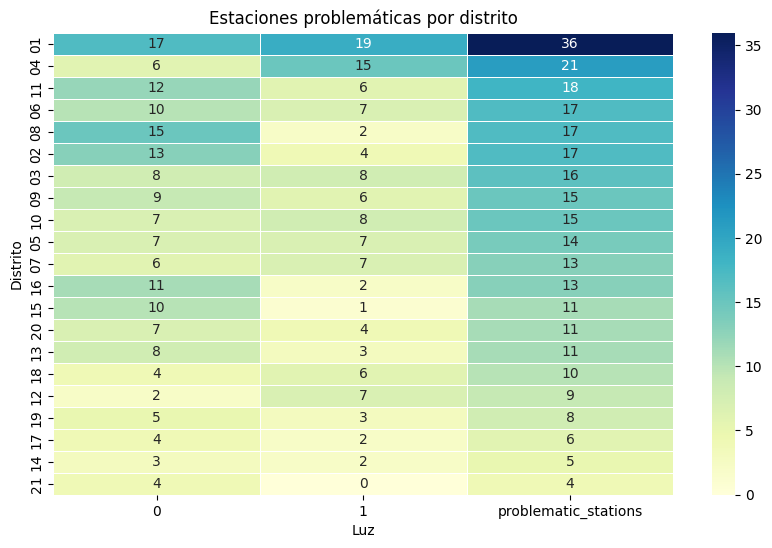

In [49]:
lights_df_sum = stations_real_time.pivot_table(index='code_district', columns='light', aggfunc='size', fill_value=0)

lights_df_sum = lights_df_sum.drop([2, 3], axis=1)
lights_df_sum["problematic_stations"] = lights_df_sum[0] +lights_df_sum[1]
lights_df_sum_sorted = lights_df_sum.sort_values(by="problematic_stations", ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(lights_df_sum_sorted, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Estaciones problemáticas por distrito')
plt.xlabel('Luz')
plt.ylabel('Distrito')
plt.show()

In [51]:
districts_ordered = lights_df_sum_sorted.index.tolist()
districts_ordered

['01',
 '04',
 '11',
 '06',
 '08',
 '02',
 '03',
 '09',
 '10',
 '05',
 '07',
 '16',
 '15',
 '20',
 '13',
 '18',
 '12',
 '19',
 '17',
 '14',
 '21']

In [15]:
def find_nearest_to_coords(df, coords):
    station_coordinates = df['coordinates'].tolist()
    nearest_station = min(station_coordinates, key=lambda coord: great_circle(coord, vehicle_start).meters)
    return nearest_station

In [16]:
stations_real_time

,address,code_district,dock_bikes,free_bases,id,light,name,number,total_bases,longitude,latitude,coordinates
0,"Calle María de las Mercedes de Borbón, 214,",16,12,11,2365,2,262 - María de las Mercedes de Borbón B,262,23,-3.620114,40.492868,"(-3.620114, 40.4928683)"
1,"Calle María de las Mercedes de Borbón, 98,",16,4,19,2366,0,611 - María de las Mercedes de Borbón A,611,23,-3.612107,40.490908,"(-3.6121068531215528, 40.490908297996654)"
2,"CalleFrancisco Balseiro, 2 ,Comunidad de Madri...",06,24,0,2362,1,237 - Acueducto de Amaniel,237,24,-3.710274,40.451682,"(-3.7102736, 40.4516819)"
3,"para borrar,",16,0,0,1404,3,0 - para borrar,0,0,-3.620180,40.492910,"(-3.62018, 40.49291)"
4,"Calle Miguel Moya nº 1,",01,22,4,1406,1,2 - Metro Callao,2,27,-3.705690,40.420400,"(-3.70569, 40.4204)"
...,...,...,...,...,...,...,...,...,...,...,...,...
608,"Glorieta de Embajadores nº 7,",02,15,9,1451,2,47 - Renfe/Cercanías Embajadores,47,24,-3.702800,40.404577,"(-3.7027998, 40.4045772)"
609,"Calle Carretas nº 3,",01,9,14,1437,2,33 - Puerta del Sol,33,23,-3.703330,40.416587,"(-3.7033305, 40.4165873)"
610,"Fuente Carrantona , 33,",14,11,16,1974,2,460 - Fuente Carrantona - Doctor García Tapia,460,27,-3.631923,40.407022,"(-3.63192261, 40.4070216)"
611,"Calle Sierra de Atapuerca, 19,",08,17,6,2250,1,578 - Sierra de Atapuerca - Viloria de Rioja,578,23,-3.670425,40.502930,"(-3.67042488, 40.50292982)"


In [17]:
load_dotenv('../.env')
client = ors.Client(key=os.environ.get("openroute_api_key"))

# Function to find the nearest station to given coordinates
def find_nearest_to_coords(df, coords):
    station_coordinates = df['coordinates'].tolist()
    nearest_station = min(station_coordinates, key=lambda coord: great_circle(coord, coords).meters)
    return nearest_station

# Function to create a route between two sets of coordinates
def create_route(client, start_coords, end_coords):
    return client.directions(
        coordinates=[start_coords, end_coords],
        profile='driving-car',
        format='geojson'
    )

# Coordenadas de inicio (supongo que empiezan la ruta en la central de la EMT)
vehicle_start = [-3.6823731969472644, 40.46209827032537]

# Creo un mapa con Folium
m = folium.Map(location=[vehicle_start[1], vehicle_start[0]], zoom_start=12)

# Añado marcador morado para la central (vehicle_start)
folium.Marker(location=[vehicle_start[1], vehicle_start[0]], popup='CENTRAL EMT', icon=folium.Icon(color='purple')).add_to(m)

distrito02_low = get_light0(district_02).copy()
distrito02_high = get_light1(district_02).copy()

distrito02_high['visited'] = False
distrito02_low['visited'] = False

# Inicio de la ruta
current_coords = vehicle_start
van = "empty"

coords_list = [current_coords]

stop_counter = 1

for i in range(100):
    if van == "empty":
        current_coords = coords_list[-1]
        # Verifica si quedan estaciones sin visitar
        if not distrito02_high.loc[~distrito02_high['visited'] & (distrito02_high['light'] == 1)].empty:
            nearest_station = find_nearest_to_coords(distrito02_high.loc[~distrito02_high['visited'] & (distrito02_high['light'] == 1)], current_coords)
            coords_list.append(nearest_station)
            # Actualiza 'visited' y 'light' en el DataFrame original
            distrito02_high.loc[distrito02_high['coordinates'] == nearest_station, 'visited'] = True
            distrito02_high.loc[distrito02_high['coordinates'] == nearest_station, 'light'] = 2
            route = create_route(client, coords_list[-2], coords_list[-1])
            van = "full"
            folium.Marker(location=[nearest_station[1], nearest_station[0]],
                          popup=f"Station with high occupation\nNumber: {stop_counter}",
                          icon=folium.Icon(color='orange')).add_to(m)
            stop_counter += 1
            folium.PolyLine(locations=[coord[::-1] for coord in route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
    elif van == "full":
        current_coords = coords_list[-1]
        # Verifica si quedan estaciones sin visitar
        if not distrito02_low.loc[~distrito02_low['visited'] & (distrito02_low['light'] == 0)].empty:
            nearest_station = find_nearest_to_coords(distrito02_low.loc[~distrito02_low['visited'] & (distrito02_low['light'] == 0)], current_coords)
            coords_list.append(nearest_station)
            # Actualiza 'visited' y 'light' en el DataFrame original
            distrito02_low.loc[distrito02_low['coordinates'] == nearest_station, 'visited'] = True
            distrito02_low.loc[distrito02_low['coordinates'] == nearest_station, 'light'] = 2
            route = create_route(client, coords_list[-2], coords_list[-1])
            van = "empty"
            folium.Marker(location=[nearest_station[1], nearest_station[0]],
                          popup=f"Station with low occupation\nNumber: {stop_counter}",
                          icon=folium.Icon(color='green')).add_to(m)
            stop_counter += 1
            folium.PolyLine(locations=[coord[::-1] for coord in route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
final_route = create_route(client, coords_list[-1], vehicle_start)
folium.PolyLine(locations=[coord[::-1] for coord in final_route['features'][0]['geometry']['coordinates']],
                            color='red').add_to(m)
print(coords_list)
m

[[-3.6823731969472644, 40.46209827032537], (-3.7071259, 40.4053153), (-3.7184816, 40.4104448), (-3.721178, 40.411622), (-3.6862653, 40.4012905), (-3.67970176633988, 40.393023802369754), (-3.688461, 40.385412), (-3.691076, 40.389041)]
